# Youtube Trending Videos - Thumbnail Analysis

### Developing/testing procedure for face detection

In [1]:
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image
from skimage import io

def get_detected_face (face):  
    face_img = face.copy()  
    fd = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
    fr = fd.detectMultiScale(face_img)  
    for (x,y,width,height) in fr:  
        cv2.rectangle(face_img, (x,y), (x + width, y+height), (255,255,77), 5)             

    if len(fr) == 0:
        result = [False,'']
    else:
        result = [True,fr]# x, y, width, height
              
    return face_img,result

def detectFromUrl(yt_id):
    url ="https://i.ytimg.com/vi/"+yt_id+"/maxresdefault.jpg"
    face1 = io.imread(url)
    face_img,result = get_detected_face(face1)
#     plt.imshow(face_img)
#     plt.show()
    return result

In [2]:
thumbnails=["gPdUslndvVI",
        "3C66w5Z0ixs",
        "p7HGUZWq_8s",
        "uet14uf9NsE",
        "VIUo6yapDbc",
        "CezxKs9YLv0",
        "GYeKX_LPY9U",
        "9AecsACtkB4",
        "p6RatnMhDj8"]

results=[]
for i in thumbnails:
    results.append(detectFromUrl(i)[1])

results

[array([[256, 239, 204, 204]], dtype=int32),
 array([[814,  44,  62,  62]], dtype=int32),
 array([[726, 132, 318, 318],
        [162, 145, 307, 307]], dtype=int32),
 array([[219, 151, 201, 201],
        [591, 210, 181, 181]], dtype=int32),
 array([[ 423,  192,   84,   84],
        [ 160,  266,   82,   82],
        [1031,  261,   90,   90],
        [1133,  264,  117,  117],
        [ 906,  374,   84,   84],
        [ 303,  433,   70,   70]], dtype=int32),
 array([[570,  86, 173, 173]], dtype=int32),
 array([[ 21, 275,  51,  51]], dtype=int32),
 '',
 array([[736, 101, 280, 280]], dtype=int32)]

## Detecting Faces in Youtube US Trending Dataset

### Library Imports

In [3]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import math

## Import dataset

In [4]:
df = pd.read_csv("US_youtube_trending_data.csv")
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [5]:
# maybe only run on the top 1% of videos!
# save these as a list and plot them
top_one_percent_videos=df.drop_duplicates(subset=['video_id'])
top_one_percent_videos = top_one_percent_videos.sort_values(by=['view_count'],ascending=False).head(math.floor(0.01*df.shape[0]))

top_one_percent_videos

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
51,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,10,2020-08-12T00:00:00Z,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,https://i.ytimg.com/vi/hsm4poTWjMs/default.jpg,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...
55605,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,67111752,7110071,8998,3400291,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
1800,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3200,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2020-08-28T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,51234434,5912778,405329,1847794,https://i.ytimg.com/vi/vRXZj0DzXIA/default.jpg,False,False,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
54804,qpw5i2j6cHc,Money Plinko Challenge! 💰 #shorts,2021-05-14T22:57:41Z,UC9SUulKzcBvThtnUopgrYyg,AnthonySenpai,20,2021-05-17T00:00:00Z,[None],43969654,1329657,42170,2756,https://i.ytimg.com/vi/qpw5i2j6cHc/default.jpg,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35076,YXuKX_0iAsQ,Rauw Alejandro - Dile A Él (Video Oficial),2021-02-03T20:00:11Z,UC_Av98lDjf5KvFib5elhpYg,RauwAlejandroTv,10,2021-02-07T00:00:00Z,rauw|rauw alejandro|Dile A Él|dile a el|dile a...,3983861,139809,2165,4409,https://i.ytimg.com/vi/YXuKX_0iAsQ/default.jpg,False,False,Rauw AlejandroDile A Él (Video Oficial)Suscríb...
1638,p7hizWT2Og4,Sidhu Moose Wala - My Block | Official Video |...,2020-08-20T03:30:03Z,UCuFwzKrS0wE43CSkyaHBGiQ,SagaHits,10,2020-08-20T00:00:00Z,sidhu moose wala new song|sidhu moose wala son...,3964410,359122,24433,287492,https://i.ytimg.com/vi/p7hizWT2Og4/default.jpg,False,False,My Block - New Punjabi song 2020 by Sidhu Moos...
408,nyzhtvtJWDQ,SuperM 슈퍼엠 ‘100' MV,2020-08-14T04:00:12Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2020-08-14T00:00:00Z,[None],3964142,1035579,15655,104509,https://i.ytimg.com/vi/nyzhtvtJWDQ/default.jpg,False,False,SuperM's new single “100” is out!🎧Listen and d...
15623,GmB3WdjdzbE,"Myke Towers, Anuel AA & Natti Natasha - Diosa ...",2020-10-29T01:14:58Z,UCLk8IJ1TwI7Xl7UUfAD8xPQ,Myke Towers,10,2020-10-30T00:00:00Z,myke towers|otro|young kingz|easy money baby|N...,3954296,282475,6784,17824,https://i.ytimg.com/vi/GmB3WdjdzbE/default.jpg,False,False,"Myke Towers, Anuel AA & Natti Natasha - Diosa ..."


In [6]:
# df['faces_detected'] = df['video_id']
ids = top_one_percent_videos['video_id'].tolist()
# from random import sample
# ids = sample(ids,200)

# ids = ids[0:100]
results=[]
for i in ids:
    try:
        results.append(detectFromUrl(i))
    except:
        results.append(['exception',''])

results

[['exception', ''],
 [True, array([[570, 199,  99,  99],
         [461, 239,  86,  86],
         [756, 235,  87,  87],
         [ 68, 240,  82,  82],
         [939, 255,  93,  93],
         [252, 260,  97,  97],
         [340, 312,  62,  62],
         [ 33, 468,  56,  56],
         [456, 526,  41,  41]], dtype=int32)],
 [True,
  array([[974, 318,  52,  52],
         [238, 301,  76,  76],
         [ 62, 320,  66,  66]], dtype=int32)],
 [True,
  array([[470, 220,  66,  66],
         [124, 222, 142, 142],
         [490, 588,  48,  48]], dtype=int32)],
 [True, array([[596, 382,  70,  70]], dtype=int32)],
 ['exception', ''],
 [True,
  array([[687, 127,  48,  48],
         [369, 170,  56,  56],
         [810, 180,  65,  65],
         [503, 234,  65,  65],
         [952, 334,  88,  88],
         [297, 354,  98,  98]], dtype=int32)],
 [True,
  array([[425, 237,  46,  46],
         [777, 235,  45,  45],
         [619, 285,  40,  40],
         [926, 286,  39,  39]], dtype=int32)],
 [True, array(

In [17]:
# results.count(True)/(results.count(True)+results.count(False))

newArray = []
# numberOfFaces=[]
for i in range(len(results)):
    newArray.append(results[i][0])
#     if (results[i][0]==True):
#         numberOfFaces.append(len(results[i][1]))

In [18]:
newArray

['exception',
 True,
 True,
 True,
 True,
 'exception',
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 'exception',
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 'exception',
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 'exception',
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 'exception',
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 'exception',
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 Fals

In [19]:
newArray.count(True)/(newArray.count(True)+newArray.count(False))

0.6928838951310862

In [20]:
top_one_percent_videos['faces_detected'] = newArray

In [23]:
top_one_percent_videos

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,faces_detected
51,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,10,2020-08-12T00:00:00Z,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,https://i.ytimg.com/vi/hsm4poTWjMs/default.jpg,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...,exception
55605,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,67111752,7110071,8998,3400291,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,True
1800,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,True
3200,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2020-08-28T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,51234434,5912778,405329,1847794,https://i.ytimg.com/vi/vRXZj0DzXIA/default.jpg,False,False,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,True
54804,qpw5i2j6cHc,Money Plinko Challenge! 💰 #shorts,2021-05-14T22:57:41Z,UC9SUulKzcBvThtnUopgrYyg,AnthonySenpai,20,2021-05-17T00:00:00Z,[None],43969654,1329657,42170,2756,https://i.ytimg.com/vi/qpw5i2j6cHc/default.jpg,False,False,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35076,YXuKX_0iAsQ,Rauw Alejandro - Dile A Él (Video Oficial),2021-02-03T20:00:11Z,UC_Av98lDjf5KvFib5elhpYg,RauwAlejandroTv,10,2021-02-07T00:00:00Z,rauw|rauw alejandro|Dile A Él|dile a el|dile a...,3983861,139809,2165,4409,https://i.ytimg.com/vi/YXuKX_0iAsQ/default.jpg,False,False,Rauw AlejandroDile A Él (Video Oficial)Suscríb...,True
1638,p7hizWT2Og4,Sidhu Moose Wala - My Block | Official Video |...,2020-08-20T03:30:03Z,UCuFwzKrS0wE43CSkyaHBGiQ,SagaHits,10,2020-08-20T00:00:00Z,sidhu moose wala new song|sidhu moose wala son...,3964410,359122,24433,287492,https://i.ytimg.com/vi/p7hizWT2Og4/default.jpg,False,False,My Block - New Punjabi song 2020 by Sidhu Moos...,True
408,nyzhtvtJWDQ,SuperM 슈퍼엠 ‘100' MV,2020-08-14T04:00:12Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2020-08-14T00:00:00Z,[None],3964142,1035579,15655,104509,https://i.ytimg.com/vi/nyzhtvtJWDQ/default.jpg,False,False,SuperM's new single “100” is out!🎧Listen and d...,True
15623,GmB3WdjdzbE,"Myke Towers, Anuel AA & Natti Natasha - Diosa ...",2020-10-29T01:14:58Z,UCLk8IJ1TwI7Xl7UUfAD8xPQ,Myke Towers,10,2020-10-30T00:00:00Z,myke towers|otro|young kingz|easy money baby|N...,3954296,282475,6784,17824,https://i.ytimg.com/vi/GmB3WdjdzbE/default.jpg,False,False,"Myke Towers, Anuel AA & Natti Natasha - Diosa ...",True


In [21]:
true_faces=top_one_percent_videos[top_one_percent_videos['faces_detected']!==True]

In [22]:
# true_faces

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,faces_detected
55605,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,67111752,7110071,8998,3400291,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,True
1800,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-21T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,True
3200,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2020-08-28T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,51234434,5912778,405329,1847794,https://i.ytimg.com/vi/vRXZj0DzXIA/default.jpg,False,False,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,True
54804,qpw5i2j6cHc,Money Plinko Challenge! 💰 #shorts,2021-05-14T22:57:41Z,UC9SUulKzcBvThtnUopgrYyg,AnthonySenpai,20,2021-05-17T00:00:00Z,[None],43969654,1329657,42170,2756,https://i.ytimg.com/vi/qpw5i2j6cHc/default.jpg,False,False,NaN,True
53612,PkKnp4SdE-w,NCT DREAM 엔시티 드림 '맛 (Hot Sauce)' MV,2021-05-10T09:02:33Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2021-05-11T00:00:00Z,[None],41105356,1727767,14578,449949,https://i.ytimg.com/vi/PkKnp4SdE-w/default.jpg,False,False,NCT DREAM's 1st album Hot Sauce is out!Listen ...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20473,UmFCLRqMkCc,HIGHLIGHTS | SPURS 2-0 MAN CITY | Son and Lo C...,2020-11-21T22:00:04Z,UCEg25rdRZXg32iwai6N6l0w,Tottenham Hotspur,17,2020-11-24T00:00:00Z,Spurs|Tottenham Hotspur|토트넘|손흥민|Spurs 2-0 Man ...,3998266,55107,1748,3904,https://i.ytimg.com/vi/UmFCLRqMkCc/default.jpg,False,False,Watch highlights from Tottenham Hotspur's 2-0 ...,True
35076,YXuKX_0iAsQ,Rauw Alejandro - Dile A Él (Video Oficial),2021-02-03T20:00:11Z,UC_Av98lDjf5KvFib5elhpYg,RauwAlejandroTv,10,2021-02-07T00:00:00Z,rauw|rauw alejandro|Dile A Él|dile a el|dile a...,3983861,139809,2165,4409,https://i.ytimg.com/vi/YXuKX_0iAsQ/default.jpg,False,False,Rauw AlejandroDile A Él (Video Oficial)Suscríb...,True
1638,p7hizWT2Og4,Sidhu Moose Wala - My Block | Official Video |...,2020-08-20T03:30:03Z,UCuFwzKrS0wE43CSkyaHBGiQ,SagaHits,10,2020-08-20T00:00:00Z,sidhu moose wala new song|sidhu moose wala son...,3964410,359122,24433,287492,https://i.ytimg.com/vi/p7hizWT2Og4/default.jpg,False,False,My Block - New Punjabi song 2020 by Sidhu Moos...,True
408,nyzhtvtJWDQ,SuperM 슈퍼엠 ‘100' MV,2020-08-14T04:00:12Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2020-08-14T00:00:00Z,[None],3964142,1035579,15655,104509,https://i.ytimg.com/vi/nyzhtvtJWDQ/default.jpg,False,False,SuperM's new single “100” is out!🎧Listen and d...,True


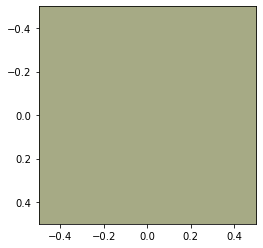

In [67]:
# # import pillow
# from PIL import Image
# import urllib.request

# def get_dominant_color(pil_img, palette_size=16):
#     # Resize image to speed up processing
#     img = pil_img.copy()
#     img.thumbnail((100, 100))

#     # Reduce colors (uses k-means internally)
#     paletted = img.convert('P', palette=Image.ADAPTIVE, colors=palette_size)

#     # Find the color that occurs most often
#     palette = paletted.getpalette()
#     color_counts = sorted(paletted.getcolors(), reverse=True)
#     palette_index = color_counts[0][1]
#     dominant_color = palette[palette_index*3:palette_index*3+3]
#     plt.imshow([[(color[0] / 255, color[1] / 255, color[2] / 255)]])
#     plt.show()


#     return dominant_color

# urllib.request.urlretrieve(
#   "https://i.ytimg.com/vi/PkKnp4SdE-w/maxresdefault.jpg",
#    "image.jpg")

# im = Image.open("image.jpg")
# color = get_dominant_color(im)